## randomly picking a model to test, then comparing TOFs for methanol and water and ensuring it is what we expect. 

In [5]:
!ls /scratch/blais.ch/methanol_results_2022_08_16_small/run_1241/cantera/

chem_annotated.cti  objective_function_ct_analysis.txt
chem.cti	    objective_function_log_ct_analysis.txt
ct_analysis.csv


In [72]:
import yaml
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
path = "/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/"
if path not in sys.path: 
    sys.path.append("/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/")
from rmg_gua.cantera.Spinning_basket_reactor.sbr import MinSBR


In [73]:
expt_condts = f"{path}rmg_gua/cantera/all_experiments_reorg_sbr.yaml"
with open(expt_condts, "r") as f: 
    data = yaml.safe_load(f)
conditions = data[2]

In [74]:
conditions["volume_flowrate"]

FC_temp = 293.15
conditions["molar_flow"] = conditions["volume_flowrate"] * 1.01325e5 / (8.3145 * FC_temp) 

In [174]:
conditions

{'catalyst_area': 44.424193000339805,
 'experiment_type': 'sbr',
 'expt_name': 'graaf_1988',
 'output': {'CH3OH': 0.0014663021657350137, 'H2O': 0.0014663021657350134},
 'pressure': 3000000.0,
 'run_num': 3.0,
 'species': {'CO': 0.065, 'CO2': 0.261, 'H2': 0.674},
 'temperature': 483.5,
 'use_for_opt': True,
 'volume': 0.0001346957850226624,
 'volume_flowrate': 6.009999999999999e-06,
 'molar_flow': 0.00024984177015083936}

In [75]:
conditions["molar_flow"] 

0.00024984177015083936

In [76]:
conditions["volume_flowrate"]

6.009999999999999e-06

In [77]:
conditions["species"]


{'CO': 0.065, 'CO2': 0.261, 'H2': 0.674}

In [262]:
cti_file = f"{path}rmg_gua/baseline/cantera/chem_annotated.cti"

reactor = MinSBR(
    cti_file,
    conditions,
    reactor_type =1,
)

# add sensitive reactions

In [263]:
# for index, rxn in enumerate(reactor.gas.reactions()):
#     if "CH4(24)" in rxn.reactants or "CH4(24)" in rxn.products:
#         print(rxn)
#         # reactor.gas.set_multiplier(0,index)
# for index, rxn in enumerate(reactor.surf.reactions()):
#     if "CH4(24)" in rxn.reactants or "CH4(24)" in rxn.products:
#         print(rxn)   
#         # reactor.surf.set_multiplier(0,index)
sens_rxns = []
for index, rxn in enumerate(reactor.surf.reactions()):
    if "CH3X(33)" in rxn.reactants or "CH3X(33)" in rxn.products:
        # print("{0:50s} : {1}".format(rxn.equation,index))
        # if "CH3OH(8)" in rxn.reactants or "CH3OH(8)" in rxn.products:
        #     # print("{0:50s} : {1}".format(rxn.equation,index))
        #     reactor.surf.set_multiplier(0,index)
        if "CH3OH*(23)" in rxn.reactants or "CH3OH*(23)" in rxn.products:
            
            print("{0:50s} : {1}\n".format(rxn.equation,index))
            reactor.surf.set_multiplier(0,index)
            sens_rxns.append(index)
        else:
            reactor.surf.set_multiplier(0,index)
            print("{0:50s} : {1}\n".format(rxn.equation,index))
            sens_rxns.append(index)

CH3OH(8) + 2 X(1) <=> CH3X(33) + OH*(12)           : 137

HCOOCH3(9) + 2 X(1) <=> CH3X(33) + HCOO*(17)       : 138

CH3O*(21) + X(1) <=> CH3X(33) + O*(11)             : 139

CH3OH*(23) + X(1) <=> CH3X(33) + OH*(12)           : 140

CH3OH*(23) + X(1) <=> CH3X(33) + OH*(12)           : 141

CH3OH*(23) + H*(10) <=> CH3X(33) + H2O*(13)        : 142

CH3OH*(23) + CO*(14) <=> CH3X(33) + COOH*(18)      : 143

CH3X(33) + HCOOH*(19) <=> CH3OH*(23) + HCO*(16)    : 144

CH2O*(20) + CH3OH*(23) <=> CH3O2*(22) + CH3X(33)   : 145

CH3OH*(23) + X(1) <=> CH3X(33) + OH*(12)           : 146

CH3OH*(23) + X(1) <=> CH3X(33) + OH*(12)           : 147

CH4(32) + O*(11) + X(1) <=> CH3X(33) + OH*(12)     : 148

CH4(32) + OH*(12) + X(1) <=> CH3X(33) + H2O*(13)   : 149

CH3X(33) + H*(10) <=> CH4(32) + 2 X(1)             : 150



In [264]:
for i in sens_rxns:
    print(i)
    reactor.rsurf.add_sensitivity_reaction(i)

137
138
139
140
141
142
143
144
145
146
147
148
149
150


In [265]:
time = 100
times = np.logspace(-9, -1, num=100)

In [272]:
reactor.sim.sensitivities()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0

In [267]:
results = {}
for time in times: 
    reactor.sim.advance(time)
    for i in range(0, len(reactor.gas.X)):
        if reactor.gas.species_names[i] not in results.keys():
            results[reactor.gas.species_names[i]] = [reactor.gas.X[i]]
        else: 
            results[reactor.gas.species_names[i]].append(reactor.gas.X[i])
    for i in range(0, len(reactor.surf.X)):
        if reactor.surf.species_names[i] not in results.keys():
            results[reactor.surf.species_names[i]] = [reactor.surf.X[i]]
        else: 
            results[reactor.surf.species_names[i]].append(reactor.surf.X[i])
    for sens_index, rxn_num in enumerate(sens_rxns):
        if f"reaction {rxn_num} sens" not in results.keys(): 
            results[f"reaction {rxn_num} sens"] = [reactor.sim.sensitivity(8, sens_index)]
        else: 
            results[f"reaction {rxn_num} sens"].append(reactor.sim.sensitivity(8, sens_index))

In [213]:
results.keys()

dict_keys(['N2', 'Ne', 'H2(2)', 'CO(3)', 'CO2(4)', 'H2O(5)', 'CH2O(6)', 'HCOOH(7)', 'CH3OH(8)', 'HCOOCH3(9)', 'CH4(32)', 'X(1)', 'H*(10)', 'O*(11)', 'OH*(12)', 'H2O*(13)', 'CO*(14)', 'CO2*(15)', 'HCO*(16)', 'HCOO*(17)', 'COOH*(18)', 'HCOOH*(19)', 'CH2O*(20)', 'CH3O*(21)', 'CH3O2*(22)', 'CH3OH*(23)', 'CH3X(33)', 'CH3OX(49)', 'reaction 137 sens', 'reaction 138 sens', 'reaction 139 sens', 'reaction 140 sens', 'reaction 141 sens', 'reaction 142 sens', 'reaction 143 sens', 'reaction 144 sens', 'reaction 145 sens', 'reaction 146 sens', 'reaction 147 sens', 'reaction 148 sens', 'reaction 149 sens', 'reaction 150 sens'])

## plot gases: 

Text(0, 0.5, 'mole fraction')

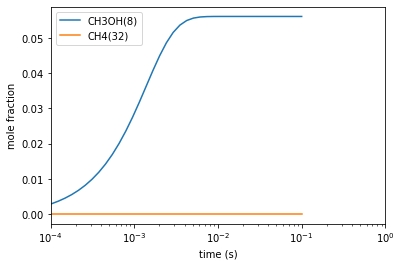

In [274]:
gas_specs = ["CH3OH(8)", "CH4(32)"]
for spec in gas_specs:
    plt.plot(times, results[spec], label = spec)
plt.legend()
plt.xlim(0.0001,1)
plt.xscale("log")
# plt.ylim(0,0.7)
plt.xlabel("time (s)")
plt.ylabel("mole fraction")

In [164]:
# see who has more, CH4 or CH3OH

Text(0, 0.5, 'mole fraction')

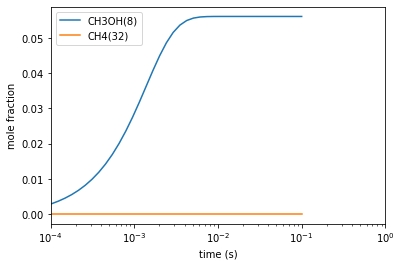

In [275]:
gas_specs = ["CH3OH(8)", "CH4(32)"]
for spec in gas_specs:
    plt.plot(times, results[spec], label = spec)
plt.legend()
plt.xlim(0.0001,1)
plt.xscale("log")
# plt.ylim(0,0.7)
plt.xlabel("time (s)")
plt.ylabel("mole fraction")

Text(0, 0.5, 'mole fraction')

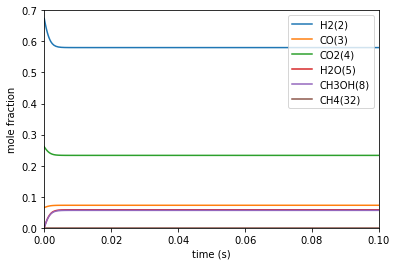

In [276]:
gas_specs = ["H2(2)","CO(3)","CO2(4)", "H2O(5)", "CH3OH(8)", "CH4(32)"]
for spec in gas_specs:
    plt.plot(times, results[spec], label = spec)
plt.legend()
plt.xlim(0,0.1)
plt.ylim(0,0.7)
plt.xlabel("time (s)")
plt.ylabel("mole fraction")

## plot surface species

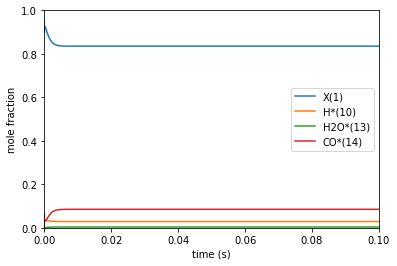

In [277]:
surf_specs = ["X(1)","H*(10)","H2O*(13)","CO*(14)"]
for spec in surf_specs:
    plt.plot(times, results[spec], label = spec)
plt.xlim(0,0.1)
plt.ylim(0,1.0)
plt.xlabel("time (s)")
plt.ylabel("mole fraction")
plt.legend()

 0.000e+00   1500.000 101325.000   9.070304e+05      0.000      0.000
 5.000e-06   1500.000 101325.000   9.070306e+05     -0.000      0.000
 1.000e-05   1499.999 101325.000   9.070307e+05      0.000      0.000
 1.500e-05   1499.999 101325.000   9.070308e+05      0.000      0.000
 2.000e-05   1499.998 101325.000   9.070309e+05      0.000      0.000
 2.500e-05   1499.998 101325.000   9.070310e+05      0.000      0.000
 3.000e-05   1499.997 101325.000   9.070311e+05      0.000      0.000
 3.500e-05   1499.997 101325.000   9.070312e+05      0.000      0.000
 4.000e-05   1499.997 101325.000   9.070313e+05      0.000      0.000
 4.500e-05   1499.996 101325.000   9.070314e+05      0.000     -0.000
 5.000e-05   1499.996 101325.000   9.070315e+05      0.000     -0.000
 5.500e-05   1499.996 101325.000   9.070316e+05      0.000     -0.000
 6.000e-05   1499.995 101325.000   9.070317e+05      0.000     -0.000
 6.500e-05   1499.995 101325.000   9.070317e+05      0.000     -0.000
 7.000e-05   1499.99

/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Legend does not support 'R1: H2 + O <=> H + OH' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/work/westgroup/ChrisB/_01_MeOH_repos/uncertainty_analysis/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: Legend does not support 'R1: HO2 + O <=> O2 + OH' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


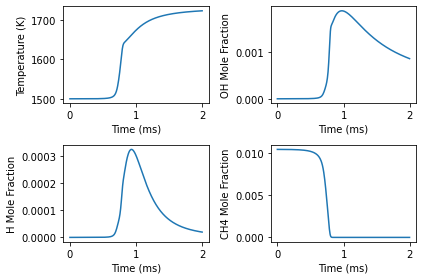

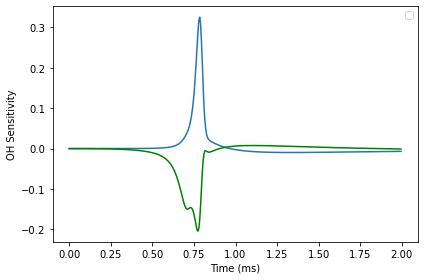

In [271]:
import sys
import numpy as np

import cantera as ct

gas = ct.Solution('gri30.cti')
temp = 1500.0
pres = ct.one_atm

gas.TPX = temp, pres, 'CH4:0.1, O2:2, N2:7.52'
r = ct.IdealGasConstPressureReactor(gas, name='R1')
sim = ct.ReactorNet([r])

# enable sensitivity with respect to the rates of the first 10
# reactions (reactions 0 through 9)
for i in range(10):
    r.add_sensitivity_reaction(i)

# set the tolerances for the solution and for the sensitivity coefficients
sim.rtol = 1.0e-6
sim.atol = 1.0e-15
sim.rtol_sensitivity = 1.0e-6
sim.atol_sensitivity = 1.0e-6

states = ct.SolutionArray(gas, extra=['t', 's2', 's3'])

for t in np.arange(0, 2e-3, 5e-6):
    sim.advance(t)
    s2 = sim.sensitivity('OH', 2)  # sensitivity of OH to reaction 2
    s3 = sim.sensitivity('OH', 3)  # sensitivity of OH to reaction 3
    states.append(r.thermo.state, t=1000*t, s2=s2, s3=s3)

    print('{:10.3e} {:10.3f} {:10.3f} {:14.6e} {:10.3f} {:10.3f}'.format(
        sim.time, r.T, r.thermo.P, r.thermo.u, s2, s3))

# plot the results if matplotlib is installed.
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states('OH').X)
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states('H').X)
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states('CH4').X)
plt.xlabel('Time (ms)')
plt.ylabel('CH4 Mole Fraction')
plt.tight_layout()

plt.figure(2)
plt.plot(states.t, states.s2, '-', states.t, states.s3, '-g')
plt.legend([sim.sensitivity_parameter_name(2), sim.sensitivity_parameter_name(3)],
           'best')
plt.xlabel('Time (ms)')
plt.ylabel('OH Sensitivity')
plt.tight_layout()
plt.show()
